In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Najbolj popularne knjige
*Projektna naloga pri predmetu Programiranje 1*

Cilj te naloge bo poiskati korelacije med popularnostjo knjige in drugimi faktorji ter priti do rezultata, kakšne knjige pritegnejo največ pozornosti.

In [2]:
knjige = pd.read_csv('zbrani_podatki/podatki.csv')

In [3]:
zanri = pd.read_csv('zbrani_podatki/zanri.csv')

## 1. Kdaj je knjiga popularna?

Kako popularna je knjiga je odvisno od večih parametrov tj. števila ocen, povprečne ocene in števila komentarjev. Če si ogledamo seznam knjig z največjim številom ocen

In [4]:
knjige[['title', 'avg_rating', 'ratings']].sort_values('ratings', ascending=False).head(15)

,title,avg_rating,ratings
32,Harry Potter and the Sorcerer's Stone,4.47,7060621
0,The Hunger Games,4.33,6384123
4,Twilight,3.60,4970612
2,To Kill a Mockingbird,4.28,4507269
27,The Great Gatsby,3.92,3780204
9,The Fault in Our Stars,4.20,3555752
80,1984,4.19,3145837
3,Pride and Prejudice,4.26,3002965
21,Divergent,4.19,2910347
147,"The Hobbit, or There and Back Again",4.27,2900069


lahko opazimo, da na prvi pogled ni korelacije med številom ocen in povprečno oceno. Preden vzamemo večji vzorec, bomo ocene zaokrožili na eno decimalko in si to shranili v tabelo.zorec, bo za risanje grafov priročno zaokrožiti oceno na prvo decimalko in to vrednost shraniti v tabelo.

In [5]:
knjige['avg_rating_rounded'] = knjige.avg_rating.round(decimals=1)

Oglejmo si sedaj graf, ki prikazuje odvisnost povprečne ocene od števila ocen

<AxesSubplot:xlabel='ocena', ylabel='število ocen'>

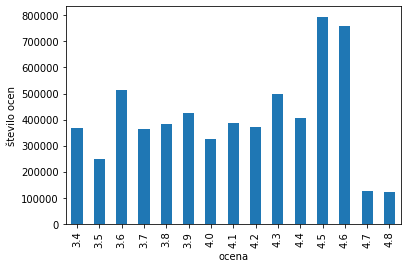

In [6]:
knjige.groupby('avg_rating_rounded').mean().ratings.plot.bar(xlabel='ocena', ylabel='število ocen')

In [7]:
knjige['avg_rating_rounded'] = knjige.avg_rating.round(decimals=1)

In [8]:
avg_no_of_ratings = knjige.ratings.mean()

In [9]:
knjige['popularity'] = knjige.avg_rating * knjige.ratings / (knjige.ratings + avg_no_of_ratings)

Oglejmo si še enkrat tabelo najbolj popularnih knjig, le da zdaj glede na našo novo definicijo popularnosti.

In [10]:
knjige.sort_values('popularity', ascending=False).head(20)

,id,title,list_placement,author_id,author,pages,date,series,avg_rating,ratings,reviews,list_score,list_votes,avg_rating_rounded,popularity
32,3,Harry Potter and the Sorcerer's Stone,33,1077326,J.K. Rowling,309.0,1997,True,4.47,7060621,112749,692791,7362,4.5,4.227867
0,2767052,The Hunger Games,1,153394,Suzanne Collins,374.0,2008,True,4.33,6384123,172388,2995995,30538,4.3,4.072077
70,136251,Harry Potter and the Deathly Hallows,71,1077326,J.K. Rowling,759.0,2007,True,4.62,2815406,65675,352603,3848,4.6,4.039780
93,5,Harry Potter and the Prisoner of Azkaban,94,1077326,J.K. Rowling,435.0,1999,True,4.57,2811681,55711,248193,2776,4.6,3.995395
103,6,Harry Potter and the Goblet of Fire,104,1077326,J.K. Rowling,734.0,2000,True,4.56,2598786,46733,178933,2049,4.6,3.946007
2,2657,To Kill a Mockingbird,3,1825,Harper Lee,324.0,1960,True,4.28,4507269,91621,2271275,23347,4.3,3.927635
105,1,Harry Potter and the Half-Blood Prince,106,1077326,J.K. Rowling,652.0,2005,True,4.57,2441364,39633,162898,1890,4.6,3.920621
1,2,Harry Potter and the Order of the Phoenix,2,1077326,J.K. Rowling,870.0,2003,True,4.50,2511624,42592,2633491,26937,4.5,3.875975
126,15881,Harry Potter and the Chamber of Secrets,127,1077326,J.K. Rowling,341.0,1998,True,4.43,2730682,53067,130760,1568,4.4,3.858607
9,11870085,The Fault in Our Stars,10,1406384,John Green,313.0,2012,False,4.20,3555752,155713,1088041,11297,4.2,3.771139


Opazimo, da na primer knjige Twilight, ki je bila v prejšni tabeli na 3. mestu, tukaj ne najdemo niti med prvimi dvajsetimi najbolj popularnimi knjigami. Osebno menim, da je to odlični pokazatelj, da naša definicija deluje, saj je Twilight kljub popularnosti knjige med najstniki prejel veliko kritike in nestrinjanja iz literarnih krogov.

In [11]:
knjige[knjige.title == 'Twilight'][['title', 'popularity']]

,title,popularity
4,Twilight,3.329167


## 2. Popularnost in uvrstitev na seznamu 'Best books ever'

Primerjajmo našo definicjo popularnosti še z uvrstitvijo knjige na seznamu 'Best books ever', h kateremu so prispevali člani Goodreads-a. 

<AxesSubplot:xlabel='popularnost', ylabel='uvrstitev'>

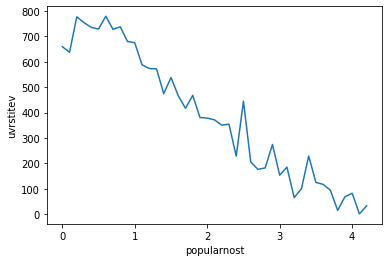

In [12]:
popularity_rounded = knjige.popularity.round(decimals=1)
knjige.groupby(popularity_rounded).mean().list_placement.plot(xlabel='popularnost', ylabel='uvrstitev')

Kot vidimo na zgornjem grafu sta popularnost in uvrstitev knjige v presenetljivo dobrem sorazmerj, kar še toliko bolj kaže na dobro izbranost definicije popularnosti. Če si ogledamo isti graf, le da v odvisnosti od ocene in števila ocen

<AxesSubplot:xlabel='ocena', ylabel='uvrstitev'>

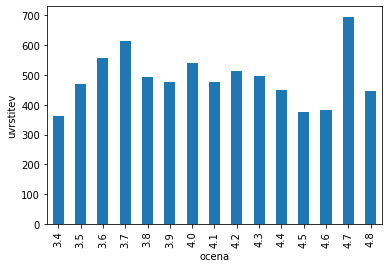

In [13]:
knjige.groupby('avg_rating_rounded').mean().list_placement.plot.bar(xlabel='ocena', ylabel='uvrstitev')

<AxesSubplot:xlabel='število ocen v sto tisočih', ylabel='uvrstitev'>

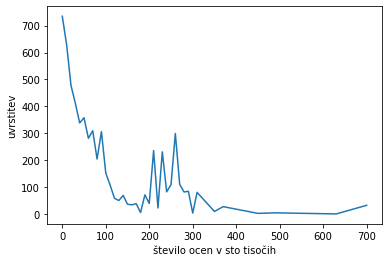

In [14]:
ratings_rounded = (knjige.ratings // 100000) * 10
knjige.groupby(ratings_rounded).mean().list_placement.plot(xlabel='število ocen v sto tisočih', ylabel='uvrstitev')

lahko opazimo veliko večja neskladanja pri odvisnosti teh dveh količin od uvrstitve.

# 3. Analiza

Začnimo zdaj z našim glavnim ciljem naloge tj. ugotoviti, kakšna mora biti knjiga, da bo, če gledamo pretekle trende, postala uspešnica.

Narišimo zdaj graf, ki prikazuje odvisnost števila ocen od povprečne ocene.

<AxesSubplot:xlabel='ocena', ylabel='število ocen'>

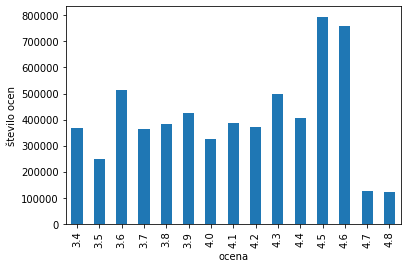

In [81]:
knjige.groupby('avg_rating_rounded').mean().ratings.plot.bar(xlabel='ocena', ylabel='število ocen')

In [206]:
knjige[['title', 'pages']].sort_values('pages', ascending=False).head(20)

,title,pages
id,,
862041,Harry Potter Series Box Set,4100.0
114345,The Little House Collection,2700.0
188572,The Complete Sherlock Holmes,1796.0
527756,The Man Without Qualities,1774.0
30,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,1728.0
690926,The Twilight Collection,1690.0
1923820,Holy Bible: King James Version,1590.0
1375,The Iliad/The Odyssey,1556.0
7822895,"The Millennium Trilogy (Millennium Trilogy, #1-3)",1531.0


In [205]:
knjige[['title', 'pages']].sort_values('pages', ascending=True).head(20)

,title,pages
id,,
4948,The Very Hungry Caterpillar,26.0
56728,You Are Special,32.0
44186,The Monster at the End of this Book,32.0
420282,The Polar Express,32.0
32929,Goodnight Moon,32.0
310259,Love You Forever,32.0
196970,The Night Before Christmas,32.0
19543,Where the Wild Things Are,37.0
144974,The Velveteen Rabbit,40.0


Opazimo, da so nekatere knjige na seznamu najdalših knjig tam zato, ker so štete ne kot individualna knjiga, ampak kot celotna serija knjig. To lahko rešimo na dva načina; da se omejimo samo na knjige, ki niso del serije, ali pa se omejimo na knjige ki ne presežejo določenega števila strani. Delali bomo z obema načinoma. Kot prvi graf prikažimo odvisnost popularnosti od števila strani.

<AxesSubplot:xlabel='pages', ylabel='popularity'>

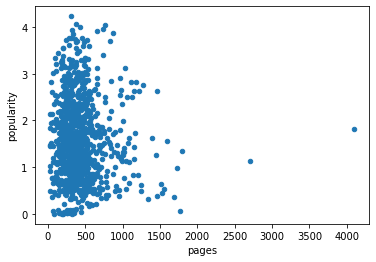

In [213]:
knjige.sort_values('pages').plot.scatter(x='pages', y='popularity', xlabel='število strani', ylabel='popularnost')

Večina knjig ima med 100 in 1300 strani. Zato se bomo pri drugem načinu omejili na knjige, ki niso daljse od 1300 strani. Podobno kot prej bomo še prej zaokrožili število strani na stotine. Narišimo zdaj grafa, ki kazeta, kako se popularnost spreminja glede na število strani za oba načina.

<AxesSubplot:xlabel='število strani', ylabel='popularnost'>

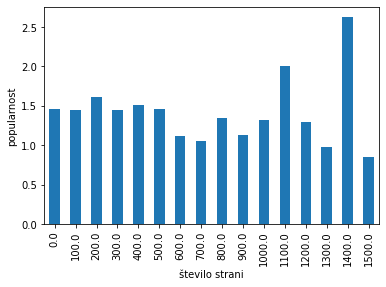

In [256]:
knjige['pages_rounded'] = (knjige.pages // 100) * 100
knjige[knjige.series == False].groupby('pages_rounded').mean().popularity.plot.bar(xlabel='število strani', ylabel='popularnost')

<AxesSubplot:xlabel='število strani', ylabel='popularnost'>

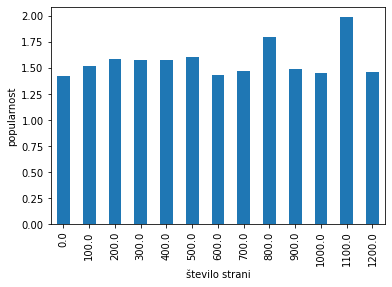

In [255]:
knjige[knjige.pages <= 1300].groupby('pages_rounded').mean().popularity.plot.bar(xlabel='število strani', ylabel='popularnost')

Opazimo velike skoke pri 1100 in 1400 stranmi, kar je verjetno posledica malega števila knjig s tolikšnim številom strani. Res, med 1000 in 1100 strani je le

In [251]:
knjige[knjige.pages_rounded == 1100].count().title

8

knjig. Vendar pa na obeh grafih opazimo manjši spust popularnosti pri knjigah z okoli 600 do 700 stranmi in veliko popularnost knjig, ki imajo manj od 600 strani. To seveda odraža realno stanje, saj večina ljudi rajši bere krajše knjige.
Število strani torej vpliva na popularnost, čeprav ne drastično.

## Leto izida

Preidimo na naslednje vprašanje 'Kakšna je korelacija med letom izdaje in oceno?'. Za začetek si poglejmo, koliko knjig je sploh izšlo na desetletje.

Iz grafa opazimo, da sta ti dve količini neodvisni druga od druge, zato bomo popularnost knjige definirali kot nekaksen miks obeh, in sicer s formulo
$$ AvgR \times \frac{NoR}{NoR + AvgNoR} $$
kjer je $AvgR$ povprečna ocena knjige, $NoR$ število ocen, ter $AvgNoR$ povprečno število ocen glede na vse knjige iz seznama.

Kakor je razvidno iz tabele, je večina knjig izšla po letu 1800, na kar se bomo pri naši analizi tudi omejili. 

<AxesSubplot:xlabel='leto izida', ylabel='popularnost'>

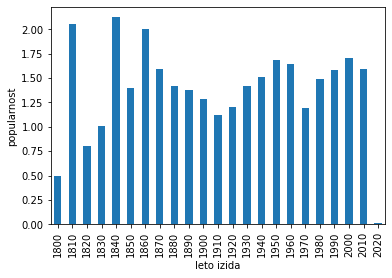

In [450]:
knjige[knjige.date_rounded >= 1800].groupby('date_rounded').mean().popularity.plot.bar(xlabel='leto izida', ylabel='popularnost')

Graf ima dva spusta, in sicer med letoma 1910 in 1920, ko lahko opazimo začetke eksperimentalnega romana, in v sedemstih letih, za kar nisem našel konkretnega razloga. Veliki vzpon pa vidimo med letom 1840 in 1850, ko so izšle naslednje knjige

In [451]:
knjige[knjige.date_rounded == 1840][['title', 'author', 'date']]

,title,author,date
13,Wuthering Heights,Emily Brontë,1847
18,Jane Eyre,Charlotte Brontë,1847
97,The Complete Stories and Poems,Edgar Allan Poe,1849
134,The Count of Monte Cristo,Alexandre Dumas,1844
160,The Three Musketeers,Alexandre Dumas,1844
371,The Tell-Tale Heart and Other Writings,Edgar Allan Poe,1843
502,Vanity Fair,William Makepeace Thackeray,1848
575,A Christmas Carol,Charles Dickens,1843


ki so vse dobro priznane klasike, ter med letoma 1810 in 1820, ko so izšle knjige

In [452]:
knjige[knjige.date_rounded == 1810][['title', 'author', 'date']]

,title,author,date
3,Pride and Prejudice,Jane Austen,1813
58,Frankenstein: The 1818 Text,Mary Wollstonecraft Shelley,1818
356,The Complete Novels,Jane Austen,1813
375,Mansfield Park,Jane Austen,1814
460,Northanger Abbey,Jane Austen,1817
554,Persuasion,Jane Austen,1818
634,Sense and Sensibility,Jane Austen,1811
708,Ivanhoe,Walter Scott,1819
718,Emma,Jane Austen,1815


pri katerih prevlada ena najbolj plodnih avtorjev vsega časa, Jane Austen. Še en večji dvig popularnosti najdemo med letoma 1860 in 1870

In [453]:
knjige[knjige.date_rounded == 1860][['title', 'author', 'date']]

,title,author,date
19,Les Misérables,Victor Hugo,1862
25,Crime and Punishment,Fyodor Dostoyevsky,1866
68,Great Expectations,Charles Dickens,1861
69,Little Women,Louisa May Alcott,1868
178,Alice in Wonderland,Jane Carruth,1865
274,The Idiot,Fyodor Dostoyevsky,1869
466,War and Peace,Leo Tolstoy,1867
899,Silas Marner,George Eliot,1861


In [ ]:
ko si bile izdane ene največjih klasik, ki so ostale relavantne še do tega dne.

## Serija ali individualna knjiga

Ali so knjige, ki so del serije, bolj popularne od individualnih knjig? Poglejmo si najprej število knjig, ki so nastopale v seriji proti številu individualnih knjig.

In [288]:
knjige.groupby('series').size()

series
False    527
True     473
dtype: int64

Knjig, ki so del serije je sicer manj kot individualnih, vendar je razlika dokaj majhna. Poglejmo si, katere so bolj popularne

<AxesSubplot:xlabel='Je del serije', ylabel='popularnost'>

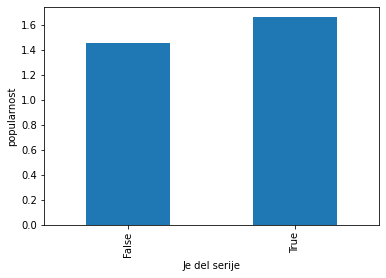

In [298]:
knjige.groupby('series').popularity.mean().plot.bar(xlabel='Je del serije', ylabel='popularnost')

Naša hipoteza je bila pravilna! Knjige, ki so del serije, seveda bolj pritegnejo bralce, ki postanejo investirani v zgodbo. Neučakano pričakujejo, da izide nov del, ter pri tem še ponovno prebirajo prejšne dele serije ter priporočajo knjigo prijateljem in družinskim članom. Takšne knjige so enostavno popularne in 'žive' dlje casa kot individualne 
knjige, katerih 'hype' lahko hitro upade.

## Žanr

In [327]:
knjige_z_zanri = pd.merge(knjige, zanri)

V današnjih časih lahko delimo knjige na res veliko število žanrov

In [416]:
knjige_z_zanri.groupby('genre').count().title.sort_values(ascending=False)

genre
Fiction         924
Classics        504
Fantasy         460
Novels          382
Young Adult     380
               ... 
Lds               1
Islam             1
Horse Racing      1
Comic Strips      1
Israel            1
Name: title, Length: 340, dtype: int64

Kar 340 če smo natančni, kar je preveč za našo analizo. Zato se bomo omejili na žanre, katerim pripada vsaj 100 knjig. To bomo naredili na naslednji način. Kot prvo rabimo seznam vseh žanrov.

In [ ]:
sez_zanrov = set({})
for zanr in knjige_z_zanri.genre:
    sez_zanrov.add(zanr)

Zdaj ločimo popularne žarne od nepopularnih in jih shranimo v seznam sez_pop_zarnov.

In [397]:
sez_pop_zanrov = []
for zanr in sez_zanrov:
    stevilo_knjig = knjige_z_zanri.groupby('genre').count().title[zanr]
    if stevilo_knjig >= 100:
        sez_pop_zanrov.append(zanr)

Na koncu še odstranimo vse nepopularne žanre in jih shranimo v seznam knjige_s_pop_zanri.

In [410]:
knjige_s_pop_zanri = knjige_z_zanri[knjige_z_zanri.genre.isin(sez_pop_zanrov)]

Lotimo se sedaj analize. Oglejmo si graf najbolj in najmanj popularnih žanrov.

<AxesSubplot:xlabel='žanr', ylabel='popularnost'>

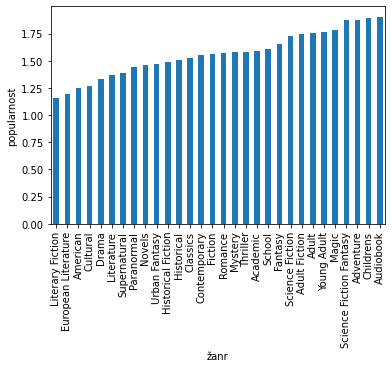

In [419]:
knjige_s_pop_zanri.groupby('genre').mean().popularity.sort_values().plot.bar(xlabel='žanr', ylabel='popularnost')

Najvišje na lestvici se nahajajo 'Audiobooks', ki niso ravno pravi žanr, zato jih spustimo. Takoj za njimi najdemo otroške knjige, na zadnjem mestu pa se nahaja literarna fikcija. Zahtevnost je torej očitno obratno sorazmerna s popularnostjo knjige. 
Oglejmo si še število knjig na žanr.

<AxesSubplot:xlabel='genre'>

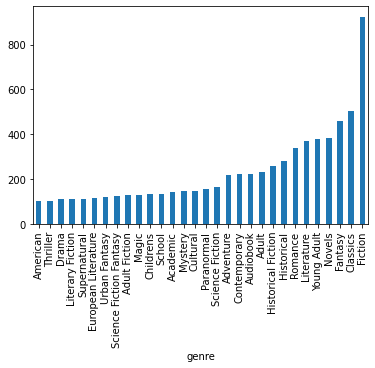

In [418]:
knjige_s_pop_zanri.groupby('genre').count().title.sort_values().plot.bar()

Veliko večino knjig sestavlja fikcija. Oziroma izmed 1000 knjig jih je kar

In [425]:
knjige_s_pop_zanri[knjige_s_pop_zanri.genre == 'Fiction'].count().title

924

fikcijskih. To je kar 92.4 % vseh knjig na našem seznamu!

# 4. Najbolj uspešen avtor

In [111]:
avg_no_of_ratings = knjige.ratings.mean()
knjige['popularity'] = knjige.avg_rating * knjige.ratings / (knjige.ratings + avg_no_of_ratings)

In [ ]:
Za konec se osredotočimo še na avtorje. Poglejmo si, kateri avtorji so napisali največje število knjig.

Na prvem mestu je seveda Stephen King, ki še tudi ni končal s pisanjem. Ali so ti avtorji tudi najbolj uspešni?

In [338]:
knjige[['author', 'popularity']].groupby("author").mean().sort_values('popularity', ascending=False).head(20)

,popularity
author,
Harper Lee,3.927635
Kathryn Stockett,3.767104
Anne Frank,3.617231
J.K. Rowling,3.524196
Khaled Hosseini,3.464455
Arthur Golden,3.335343
Antoine de Saint-Exupéry,3.325564
Charlotte Brontë,3.307757
Paula Hawkins,3.299148


In [339]:
knjige[['author', 'ratings']].groupby("author").mean().sort_values('ratings', ascending=False).head(20)

,ratings
author,
Harper Lee,4.507269e+06
Suzanne Collins,2.860413e+06
Anne Frank,2.745447e+06
J.K. Rowling,2.625495e+06
William Golding,2.265615e+06
Kathryn Stockett,2.167168e+06
Paula Hawkins,2.114707e+06
George Orwell,2.018338e+06
Alice Sebold,2.016126e+06


Kot vidimo iz zgornjih dveh tabeli, avtorji, ki so napisali veliko knjig, le niso tako popularni. Kvantita torej le ne implicira kvaliteto.